In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, accuracy_score


In [2]:
df = pd.read_csv('creditcard.csv')


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [4]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


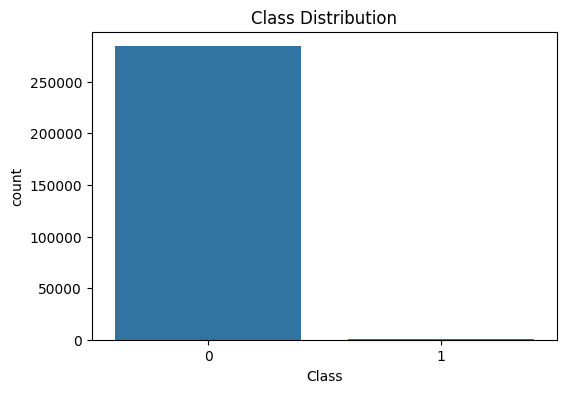

In [5]:
# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [6]:
# Normalize the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [7]:
# Drop 'Time' feature as it may not be useful
df.drop(columns=['Time'], inplace=True)


In [8]:
# Separate the features and target variable
X = df.drop(columns=['Class'])
y = df['Class']


In [9]:
# Handle class imbalance using oversampling
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [10]:
# Separate features and target from the upsampled dataset
X_upsampled = df_upsampled.drop(columns=['Class'])
y_upsampled = df_upsampled['Class']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.3, random_state=42)


In [12]:
# Train logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [13]:
# Train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [14]:
# Evaluate models
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     85138
           1       0.98      0.92      0.95     85451

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85138
           1       1.00      1.00      1.00     85451

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [15]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Logistic Regression Accuracy: 0.95
Random Forest Accuracy: 1.00


In [16]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


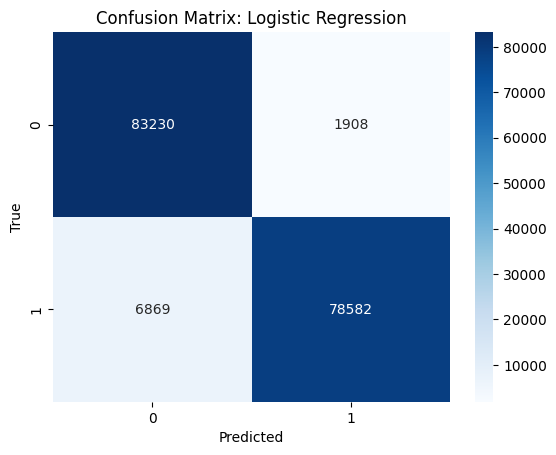

In [17]:
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")



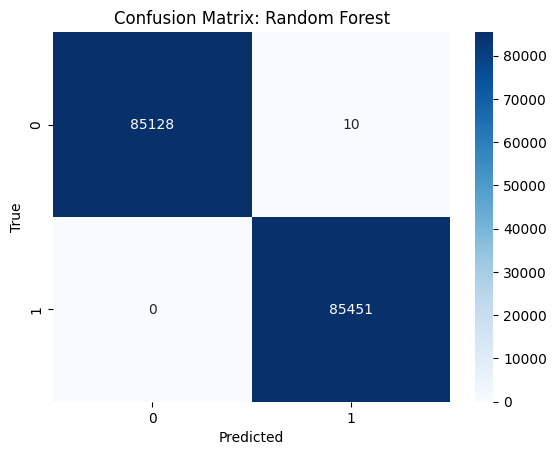

In [18]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

In [19]:
# Precision-Recall Curve
def plot_precision_recall(y_test, y_pred, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, marker='.')
    plt.title(f'Precision-Recall Curve: {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

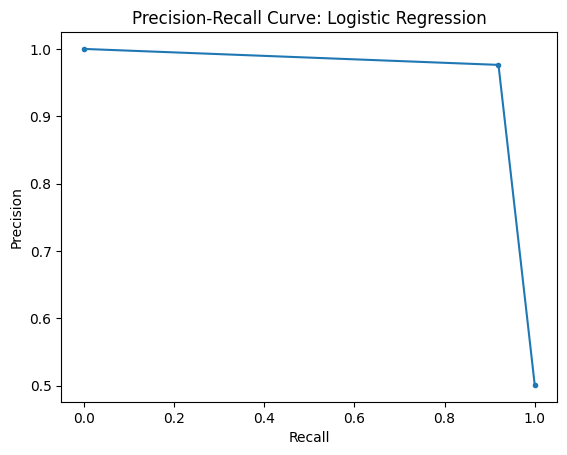

In [20]:
plot_precision_recall(y_test, y_pred, "Logistic Regression")


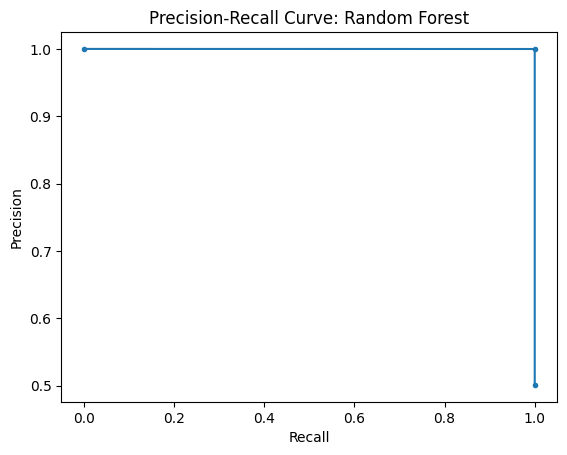

In [21]:
plot_precision_recall(y_test, y_pred_rf, "Random Forest")


In [22]:
# ROC Curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve: {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

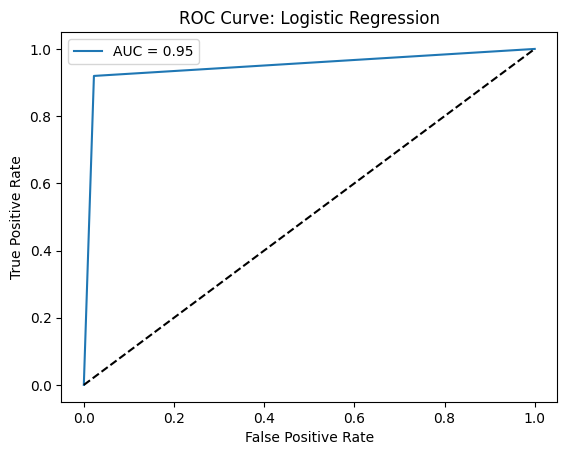

In [23]:
plot_roc_curve(y_test, y_pred, "Logistic Regression")


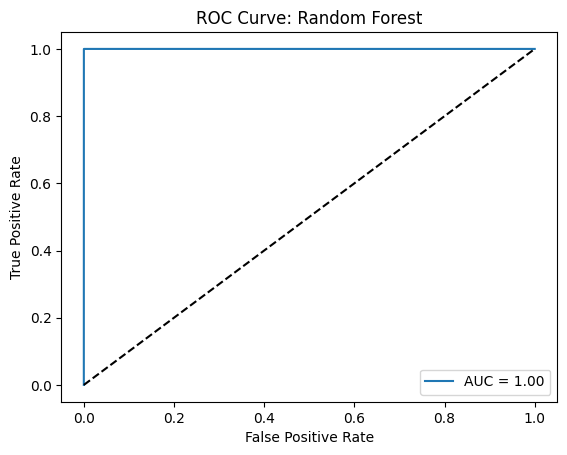

In [24]:
plot_roc_curve(y_test, y_pred_rf, "Random Forest")


In [25]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Logistic Regression Accuracy: 0.95
Random Forest Accuracy: 1.00
